In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

  property_type  capacity   T  N  replication state_space_size    saa_time  \
0      boutique        50  28  7            0     781250000000  292.201514   
1      boutique        50  28  7            1     781250000000  301.489500   
2      boutique        50  28  7            2     781250000000  150.940726   
3      boutique        50  28  7            3     781250000000  302.950799   
4      boutique        50  28  7            4     781250000000  295.502450   

   saa_revenue  dp_time  dp_revenue  
0  6378.112000      NaN         NaN  
1  6349.471108      NaN         NaN  
2  6473.376349      NaN         NaN  
3  6542.021441      NaN         NaN  
4  6288.090315      NaN         NaN  


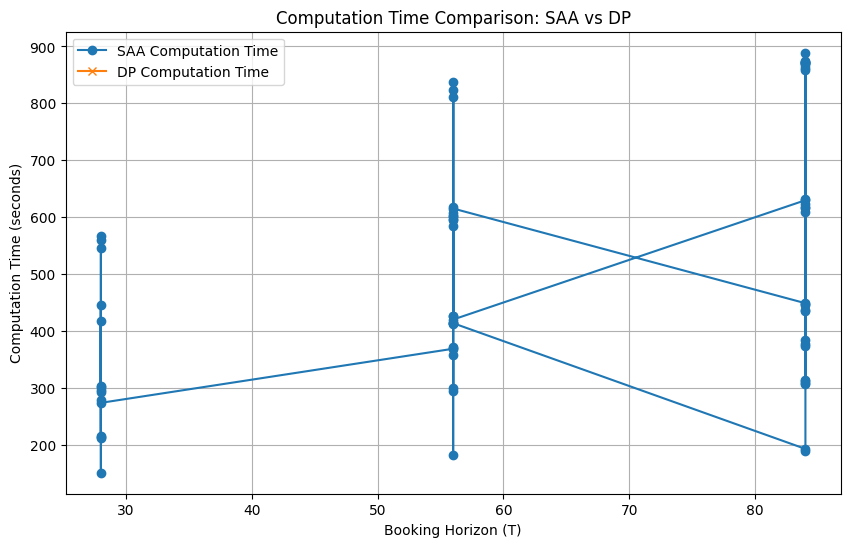

DP becomes infeasible for the following problem sizes:
       T   N
0     28   7
1     28   7
2     28   7
3     28   7
4     28   7
..   ...  ..
135  336  84
136  336  84
137  336  84
138  336  84
139  336  84

[140 rows x 2 columns]


In [2]:
# Load the CSV file to analyze
file_path = '../data/raw/experiment2_raw_results.csv'

# Check if the file exists before attempting to load
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    
    # Display the first few rows of the data to understand its structure
    print(data.head())

    # Ensure the necessary columns for computation time comparison exist
    if {'T', 'N', 'saa_time', 'dp_time'}.issubset(data.columns):
        # Filter data to include only small and medium problem sizes
        small_medium_data = data[(data['T'] <= 100) & (data['N'] <= 50)]

        # Plot comparison of computation times for SAA and DP
        plt.figure(figsize=(10, 6))
        plt.plot(small_medium_data['T'], small_medium_data['saa_time'], label='SAA Computation Time', marker='o')
        plt.plot(small_medium_data['T'], small_medium_data['dp_time'], label='DP Computation Time', marker='x')
        plt.xlabel('Booking Horizon (T)')
        plt.ylabel('Computation Time (seconds)')
        plt.title('Computation Time Comparison: SAA vs DP')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Highlight where DP becomes infeasible
        dp_infeasible = data[data['dp_time'].isnull()]
        if not dp_infeasible.empty:
            print("DP becomes infeasible for the following problem sizes:")
            print(dp_infeasible[['T', 'N']])
    else:
        print("Error: Required columns ('T', 'N', 'SAA_time', 'DP_time') are missing from the dataset.")
else:
    print(f"Error: File not found at {file_path}. Please verify the file path.")